In [1]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=cee31634b96c5e2e1a61cd3c7431fb0e48a53dfdf69d95b660c89e05bc1a87d8
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

In [3]:
df_train = pd.read_excel("/kaggle/input/bemoc-clean/bemoc_clean.xlsx")

In [4]:
df_train.head()

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করা...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust


In [5]:
df_train.dropna(inplace=True)

In [6]:
longest_string = max(df_train["TEXT"], key=len)
print(len(longest_string))

1067


In [7]:
df_train['classes'].value_counts()

classes
joy         1524
disgust     1356
sadness     1327
anger       1052
fear         962
surprise     779
Name: count, dtype: int64

In [8]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)


In [9]:
df_train['TEXT'] = df_train['TEXT'].apply(clean_text)

In [10]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(df_train['TEXT'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00004 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
অপশনও    0.000038
অবসরপ    0.000025
অলকবন    0.000030
অসফল     0.000033
আওরঙ     0.000036
           ...   
সনপত     0.000040
সবম      0.000033
সরণক     0.000040
হউদ      0.000038
ৎন       0.000039
Length: 109, dtype: float64


In [11]:
# Function to remove less important words
def remove_less_important_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)


In [12]:
df_train['TEXT'] = df_train['TEXT'].apply(remove_less_important_words)

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2,stratify=df_train['classes'],random_state=42)

In [14]:
X_train  =  train_df['TEXT'].values.tolist()
y_train = train_df['classes'].tolist()

In [15]:
X_test =  test_df['TEXT'].values.tolist()
y_test = test_df['classes'].tolist()

In [16]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 57.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 37.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 9.7 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=2823213eea5cb3920352ff50b245a8a910d5b667ee6ea673823ae1097ca22ae8
  Stored in directory: /root

In [17]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-multilingual-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [18]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 57


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 61


In [19]:
print(trn)

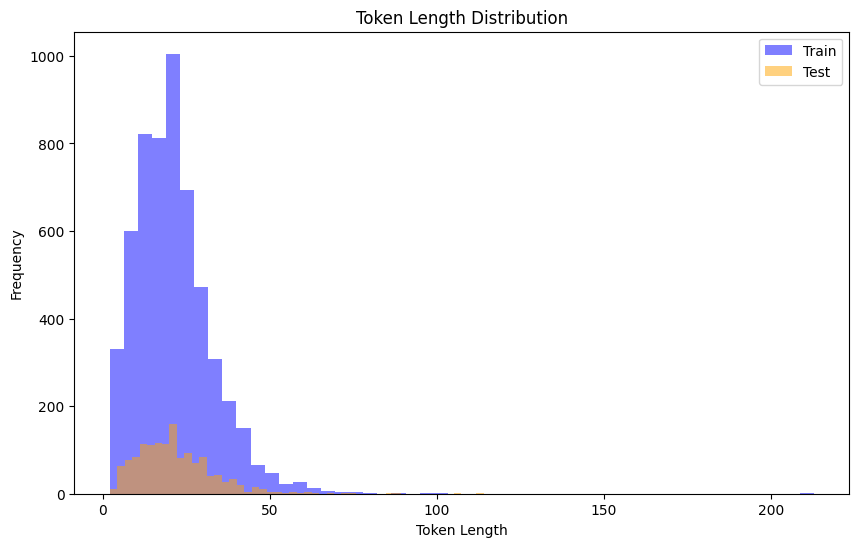

In [20]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [21]:
model = t.get_classifier()

In [22]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [23]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [24]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
700/700 [==============================] - 452s 605ms/step - loss: 1.6835 - accuracy: 0.2980 - val_loss: 1.4488 - val_accuracy: 0.4471
Epoch 2/10
700/700 [==============================] - 420s 599ms/step - loss: 1.3655 - accuracy: 0.4729 - val_loss: 1.2972 - val_accuracy: 0.4779
Epoch 3/10
700/700 [==============================] - 419s 599ms/step - loss: 1.1172 - accuracy: 0.5784 - val_loss: 1.1411 - val_accuracy: 0.5614
Epoch 4/10
700/700 [==============================] - 419s 598ms/step - loss: 0.9395 - accuracy: 0.6514 - val_loss: 1.1281 - val_accuracy: 0.5693
Epoch 5/10
700/700 [==============================] - 419s 598ms/step - loss: 0.7786 - accuracy: 0.7138 - val_loss: 1.2571 - val_accuracy: 0.5550
Epoch 6/10
700/700 [==============================] - 419s 599ms/step - loss: 0.6045 - accuracy: 0.7841 - val_loss: 1.2948 - val_accuracy: 0.5636
Epoch 7/10
700/700 [==============================] - 417s 59

In [25]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [26]:
classes=t.get_classes()

In [27]:
cm = learner.validate(class_names=t.get_classes())

44/44 [==============================] - 19s 359ms/step
              precision    recall  f1-score   support

       anger       0.49      0.43      0.46       211
     disgust       0.48      0.52      0.50       271
        fear       0.69      0.77      0.73       192
         joy       0.74      0.70      0.72       305
     sadness       0.56      0.57      0.57       265
    surprise       0.56      0.52      0.54       156

    accuracy                           0.59      1400
   macro avg       0.59      0.59      0.59      1400
weighted avg       0.59      0.59      0.59      1400

